## Linear Regression Model <a href="http://archive.ics.uci.edu/ml/datasets/statlog+(heart)"><font color='#28b9fa'>Heart Disease Dataset</font></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
hd = pd.read_table('heart_disease.txt')
hd.head(10)

,age,sex,chest_pain_type,resting_bp,serum_chol,fasting_blood_sugar,electrocardio,max_heart_rate,exercise_induced_angina,oldpeak,slope,major_vessels,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,2
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,2


<font color='blue'>Creating 80/20 training and test set</font> 

In [3]:
X3 = hd.iloc[:,:-2].values
y3 = hd.iloc[:,-1].values
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size = 0.20, random_state=1, stratify=y3)
print('Training Features Shape:', X_train_3.shape)
print('Test Features Shape:    ', X_test_3.shape)

Training Features Shape: (216, 12)
Test Features Shape:     (54, 12)


<font color='blue'>Creating linear regression model and displaying the intercepts and coefficients for the final model</font> 

In [4]:
hd_mod = LogisticRegression(solver='lbfgs', penalty='none', max_iter = 5000)
hd_mod.fit(X_train_3, y_train_3)

print('Intercept:   ',  hd_mod.intercept_)
print('Coefficients:\n', hd_mod.coef_)

Intercept:    [-9.52967143]
Coefficients:
 [[-0.03183689  2.44198952  0.83403876  0.03010625  0.01508693 -0.83280773
   0.14567792 -0.02243848  0.9147286   0.3738812   0.55023556  1.16606382]]


<font color='blue'>Calculating the accuracy for the training and testing set</font> 

In [5]:
train_acc = hd_mod.score(X_train_3, y_train_3)
test_acc = hd_mod.score(X_test_3, y_test_3)

print('Training Accuracy:', round(train_acc,4))
print('Testing Accuracy: ', round(test_acc,4))

Training Accuracy: 0.8287
Testing Accuracy:  0.8519


<font color='blue'>Generating heart disease predictions based on the feature values in the test set</font> 

In [6]:
test_pred_3 = hd_mod.predict(X_test_3)
print('Observed Labels: ', y_test_3[:20])
print('Predicted Labels:', test_pred_3[:20])

Observed Labels:  [2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1]
Predicted Labels: [2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1]


<font color='blue'>Using predict_proba() method of the model to estimate probabilities of being in each of the two classes for each individual in the test set</font> 

In [7]:
hd_pred_test = hd_mod.predict_proba(X_test_3[:10,])
hd_pred_test = pd.DataFrame(hd_pred_test,
                           columns = ['1', '2'])
hd_pred_test

,1,2
0,0.011372,0.988628
1,0.042397,0.957603
2,0.084228,0.915772
3,0.712585,0.287415
4,0.830532,0.169468
5,0.116291,0.883709
6,0.857359,0.142641
7,0.953504,0.046496
8,0.008170,0.991830
9,0.995948,0.004052


<font color='blue'>Visualizations of estimated probablities</font> 

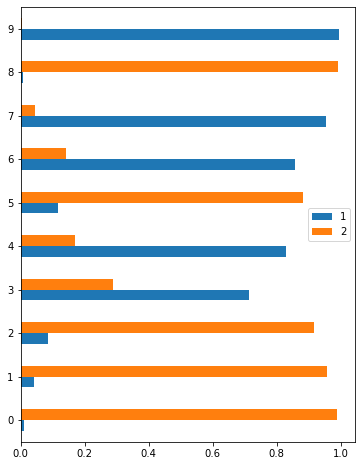

In [9]:
hd_pred_test.plot.barh(figsize = (6,8));